In [1]:
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
import os

#### Get dataframe from each .nc file (one file from one year). The datadrame contains data from defined altitude 'level'. The columns of the dataframe are different tracers, theta[K], press[hpa], temperature[K], datetime, year and month. 

In [2]:
def get_df(fname, level):
    with nc.Dataset(fname, 'r') as ac:
        # print(ac.variables['alt'][level], 'km')
        times = ac.variables['time'][:]
        dt = nc.num2date(times, ac.variables['time'].units)
        lat = ac.variables['LAT'][:]
        lon = ac.variables['LON'][:]

        data = {'juli_sec':times, 'datetime':dt, 'lat':lat, 'lon':lon}
        keys = ['PRESS'] + list(ac.variables.keys())[9:]


        for key in keys:
            data.update({key:ac.variables[key][:, level]})

        df = pd.DataFrame(data=data)
        df['THETA'] = (df['TEMP'] / np.power(0.001*df['PRESS'], 0.286)).round(0)
        df['datetime'] = pd.to_datetime(df['datetime'])
        df['year'] = [df['datetime'][i].year for i in range(len(df))]
        df['month'] = [df['datetime'][i].month for i in range(len(df))]
        return df

#### Merge dataframes from all years. 

In [3]:
def get_data(level):
    path = '/usr/nfs/data/sat_data/ace-fts/ncdf_v3.6_qual_flag/'
    lst = sorted(os.listdir(path))
    fts = lst[:15]
    df_lst = []
    for fname in fts:
        df_lst.append(get_df(path + fname, level))
    df_all = pd.concat(df_lst)
    return df_all

#### Read air mass origin locations from .csv file. The trajectories last 40 days. Only origins from time period 22400-22800 are included in the file.

In [4]:
origin = pd.read_csv('origin.csv')
origin1 = origin[(origin['t_start'] <= 22460)]
origin2 = origin[(origin['t_start'] > 22460) & (origin['t_start'] <= 22550)]
origin3 = origin[(origin['t_start'] >= 22570) & (origin['t_start'] <= 22700)]
origin4 = origin[(origin['t_start'] > 22700) & (origin['t_start'] <= 22750)]

#### A quick view of the concentration of HCN and THETA at 15.5 km in May-July. 

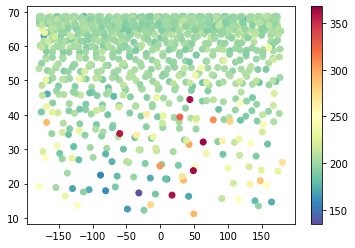

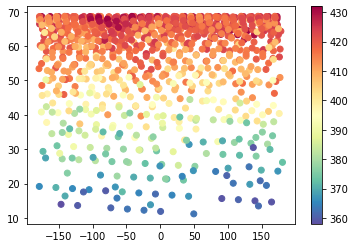

In [5]:
% matplotlib inline
df_all = get_data(15)
df1 = df_all[df_all['year']==2017]
df = df1[(df1['month']==5) | (df1['month']==6) | (df1['month']==7)]
df = df[df['lat']>0]

plt.scatter(df['lon'], df['lat'], c=1.e+12*df['HCN'], cmap='Spectral_r')
plt.colorbar()
plt.show()

plt.scatter(df['lon'], df['lat'], c=df['THETA'], cmap='Spectral_r')
plt.colorbar()
plt.show()

#### Grid HCN from 15.5 km. 

/home/icg1/icg140/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/icg1/icg140/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


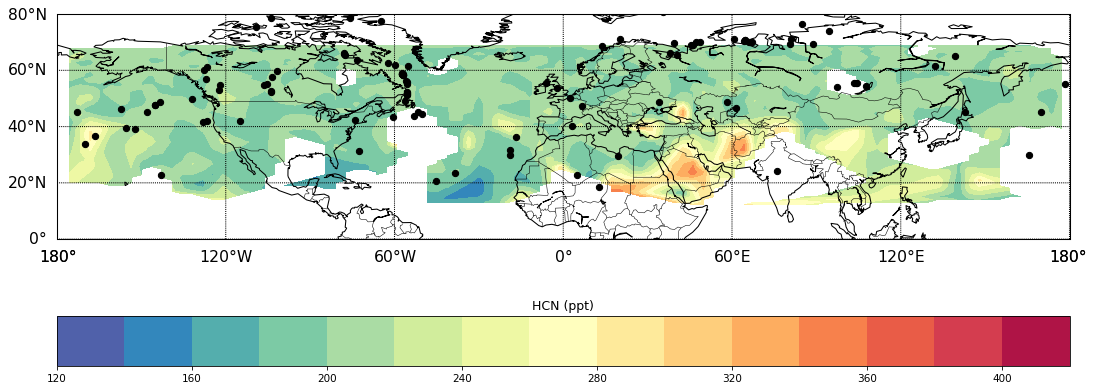

In [6]:
%matplotlib inline
fig = plt.figure(1, figsize=(15, 8), dpi=75)
ax = fig.add_axes([0.05, 0.05, 0.9, 0.85])
m = Basemap(projection='cyl', llcrnrlat=0, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(0, 81, 20.), labels=[1, 0, 0, 0], fontsize=15)
m.drawmeridians(np.arange(-180, 181., 60.), labels=[0, 0, 0, 1], fontsize=15)
m.drawmapboundary()

x = df['lon']
y = df['lat']
z= 1.e+12*df['HCN']

m_lon, m_lat = m(*(x, y))
# print(m_lon.min(), m_lon.max(), m_lat.min(), m_lat.max())
xgrid = np.linspace(m_lon.min(), m_lon.max(), 100)
ygrid = np.linspace(m_lat.min(), m_lat.max(), 60)
xgrid, ygrid = np.meshgrid(xgrid, ygrid)
zgrid = griddata((x, y), z, (xgrid, ygrid), method='linear')

cmap = 'Spectral_r'
plt.plot(origin1.lon, origin1.lat, lw=0, marker='o', color='k')
plt.plot(origin4.lon, origin4.lat, lw=0, marker='o', color='k')
plt.contourf(xgrid, ygrid, zgrid, levels=np.arange(120, 440, 20), cmap='Spectral_r')
cbar = plt.colorbar(orientation='horizontal', extend='max')
cbar.ax.set_title('HCN (ppt)')
#plt.title(str(press[level]))
plt.show()

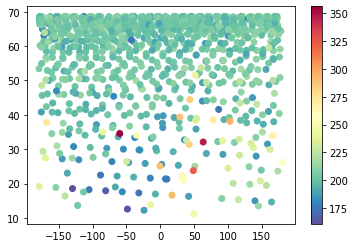

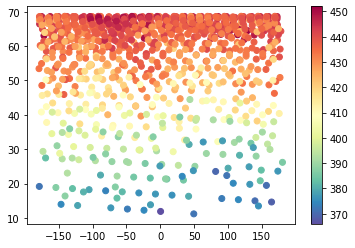

In [7]:
df_all = get_data(16)
df1 = df_all[df_all['year']==2017]
df = df1[(df1['month']==5) | (df1['month']==6) | (df1['month']==7)]
df = df[df['lat']>0]

plt.scatter(df['lon'], df['lat'], c=1.e+12*df['HCN'], cmap='Spectral_r')
plt.colorbar()
plt.show()

plt.scatter(df['lon'], df['lat'], c=df['THETA'], cmap='Spectral_r')
plt.colorbar()
plt.show()

/home/icg1/icg140/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/icg1/icg140/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


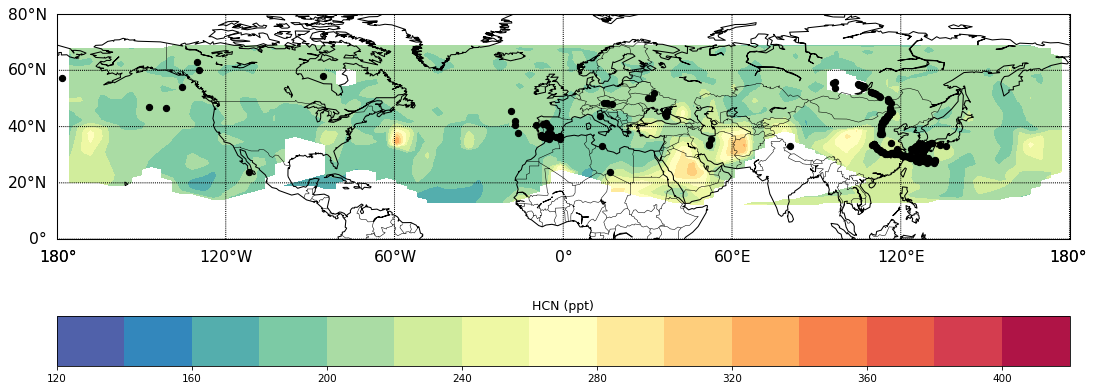

In [8]:
%matplotlib inline
fig = plt.figure(1, figsize=(15, 8), dpi=75)
ax = fig.add_axes([0.05, 0.05, 0.9, 0.85])
m = Basemap(projection='cyl', llcrnrlat=0, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(0, 81, 20.), labels=[1, 0, 0, 0], fontsize=15)
m.drawmeridians(np.arange(-180, 181., 60.), labels=[0, 0, 0, 1], fontsize=15)
m.drawmapboundary()

x = df['lon']
y = df['lat']
z= 1.e+12*df['HCN']

m_lon, m_lat = m(*(x, y))
# print(m_lon.min(), m_lon.max(), m_lat.min(), m_lat.max())
xgrid = np.linspace(m_lon.min(), m_lon.max(), 100)
ygrid = np.linspace(m_lat.min(), m_lat.max(), 60)
xgrid, ygrid = np.meshgrid(xgrid, ygrid)
zgrid = griddata((x, y), z, (xgrid, ygrid), method='linear')

cmap = 'Spectral_r'
plt.plot(origin2.lon, origin2.lat, lw=0, marker='o', color='k')
plt.plot(origin3.lon, origin3.lat, lw=0, marker='o', color='k')
plt.contourf(xgrid, ygrid, zgrid, levels=np.arange(120, 440, 20), cmap='Spectral_r')
cbar = plt.colorbar(orientation='horizontal', extend='max')
cbar.ax.set_title('HCN (ppt)')
#plt.title(str(press[level]))
plt.show()

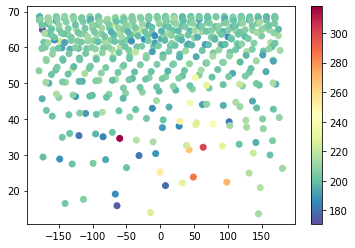

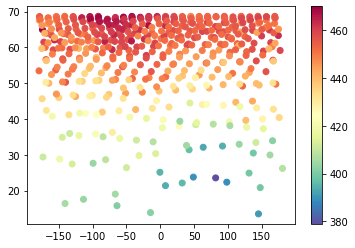

In [9]:
df_all = get_data(17)
df1 = df_all[df_all['year']==2017]
df = df1[(df1['month']==6) | (df1['month']==7)]
df = df[df['lat']>0]

plt.scatter(df['lon'], df['lat'], c=1.e+12*df['HCN'], cmap='Spectral_r')
plt.colorbar()
plt.show()

plt.scatter(df['lon'], df['lat'], c=df['THETA'], cmap='Spectral_r')
plt.colorbar()
plt.show()

/home/icg1/icg140/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/icg1/icg140/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


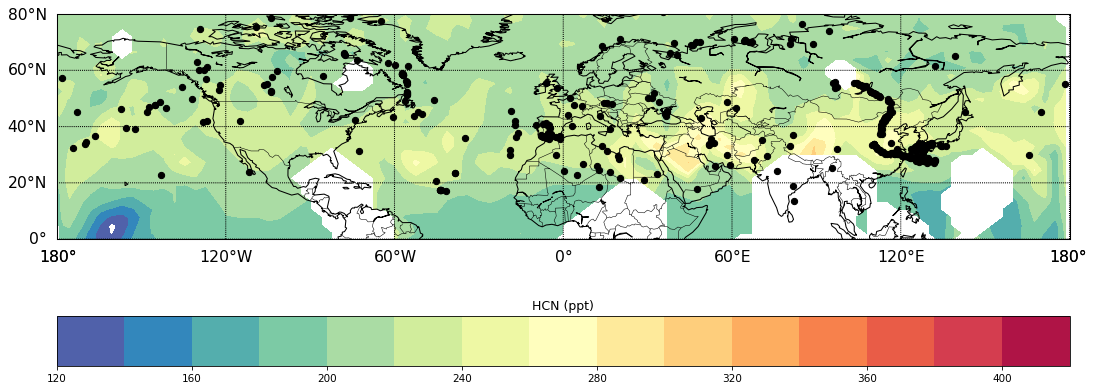

In [33]:
%matplotlib inline
fig = plt.figure(1, figsize=(15, 8), dpi=75)
ax = fig.add_axes([0.05, 0.05, 0.9, 0.85])
m = Basemap(projection='cyl', llcrnrlat=0, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(0, 81, 20.), labels=[1, 0, 0, 0], fontsize=15)
m.drawmeridians(np.arange(-180, 181., 60.), labels=[0, 0, 0, 1], fontsize=15)
m.drawmapboundary()

x = df['lon']
y = df['lat']
z= 1.e+12*df['HCN']

m_lon, m_lat = m(*(x, y))
# print(m_lon.min(), m_lon.max(), m_lat.min(), m_lat.max())
xgrid = np.linspace(m_lon.min(), m_lon.max(), 100)
ygrid = np.linspace(m_lat.min(), m_lat.max(), 60)
xgrid, ygrid = np.meshgrid(xgrid, ygrid)
zgrid = griddata((x, y), z, (xgrid, ygrid), method='linear')

cmap = 'Spectral_r'
plt.plot(origin2.lon, origin2.lat, lw=0, marker='o', color='k')
plt.plot(origin3.lon, origin3.lat, lw=0, marker='o', color='k')
plt.contourf(xgrid, ygrid, zgrid, levels=np.arange(120, 440, 20), cmap='Spectral_r')
cbar = plt.colorbar(orientation='horizontal', extend='max')
cbar.ax.set_title('HCN (ppt)')
#plt.title(str(press[level]))
plt.show()

In [99]:
def get_pl(level, year, month1, month2, month3,):
    df_all = get_data(level)
    # print(df_all.columns)
    df1 = df_all[df_all['year']==year]
    df = df1[(df1['month']==month1) | (df1['month']==month2)| (df1['month']==month3)]
    # df = df[df['lat']>0]
    fig = plt.figure(1, figsize=(15, 8), dpi=75)
    ax = fig.add_axes([0.05, 0.05, 0.9, 0.85])
    m = Basemap(projection='cyl', llcrnrlat=0, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
    m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(0, 81, 20.), labels=[1, 0, 0, 0], fontsize=15)
    m.drawmeridians(np.arange(-180, 181., 60.), labels=[0, 0, 0, 1], fontsize=15)
    m.drawmapboundary()

    x = df['lon']
    y = df['lat']
    z= 1.e+12*df['HCN']

    m_lon, m_lat = m(*(x, y))
    print(m_lon.min(), m_lon.max(), m_lat.min(), m_lat.max())
    xgrid = np.linspace(m_lon.min(), m_lon.max(), 100)
    ygrid = np.linspace(m_lat.min(), m_lat.max(), 60)
    xgrid, ygrid = np.meshgrid(xgrid, ygrid)
    zgrid = griddata((x, y), z, (xgrid, ygrid), method='linear')
# levels=np.arange(100, 301, 20), 
    cmap = 'Spectral_r'
    plt.plot(origin.lon, origin.lat, lw=0, marker='o', color='k')
    plt.contourf(xgrid, ygrid, zgrid, levels=range(120, 301, 20), cmap='Spectral_r')
    cbar = plt.colorbar(orientation='horizontal', extend='max')
    cbar.ax.set_title('HCN (ppt)')
    plt.title('Alt='+str(level) + '.5 km '+' ' + str(year) + ' JFM')
    plt.show()

/home/icg1/icg140/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/icg1/icg140/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


-181.55 180.63 -80.66 68.67


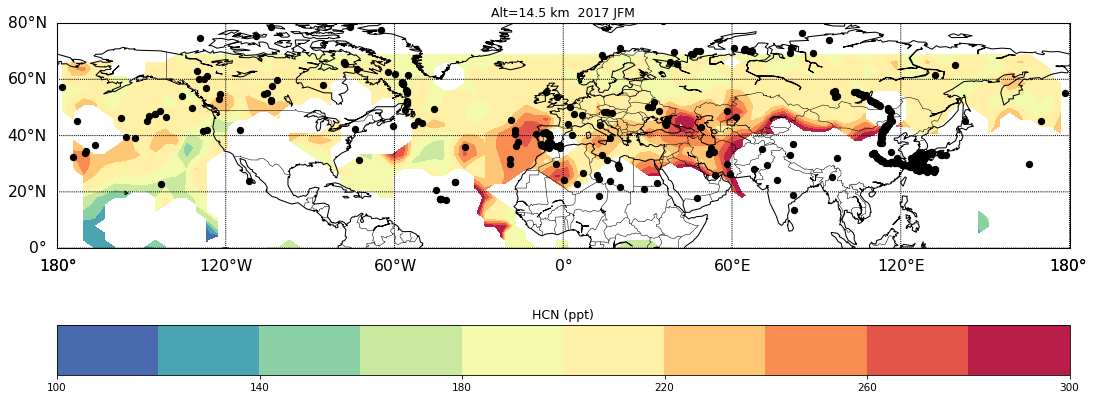

-181.55 180.63 -80.66 68.67


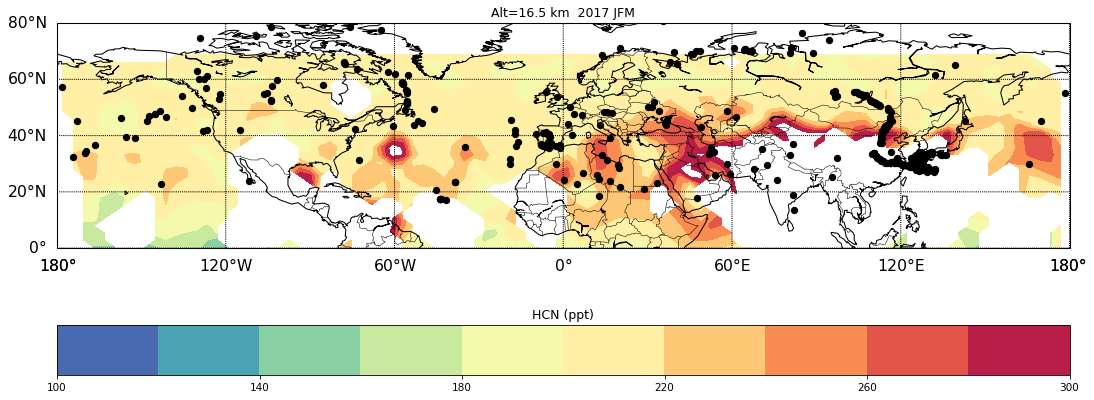

-181.55 180.63 -80.66 68.67


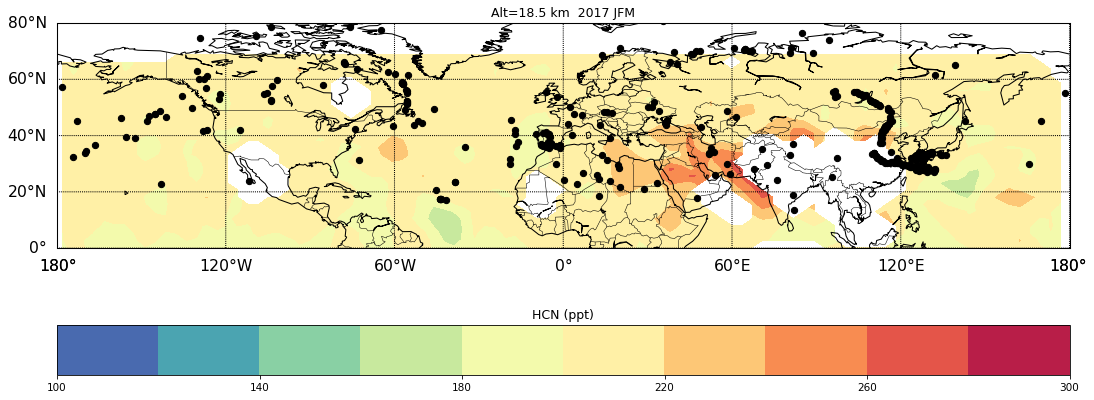

-181.55 180.63 -80.66 68.67


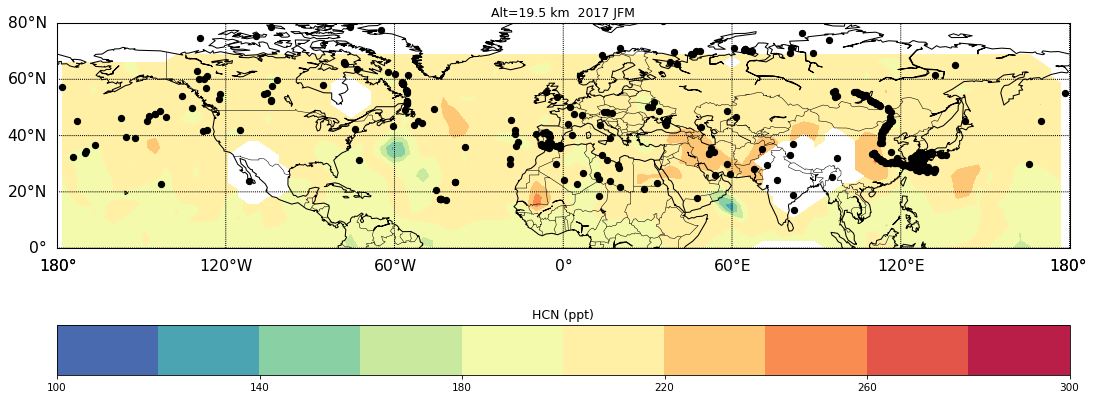

In [74]:
get_pl(14, 2017, 6, 7, 8)
get_pl(16, 2017, 6, 7, 8)
get_pl(18, 2017, 6, 7, 8)
get_pl(19, 2017, 6, 7, 8)

/home/icg1/icg140/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/icg1/icg140/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


-181.94 179.71 -81.75 83.08


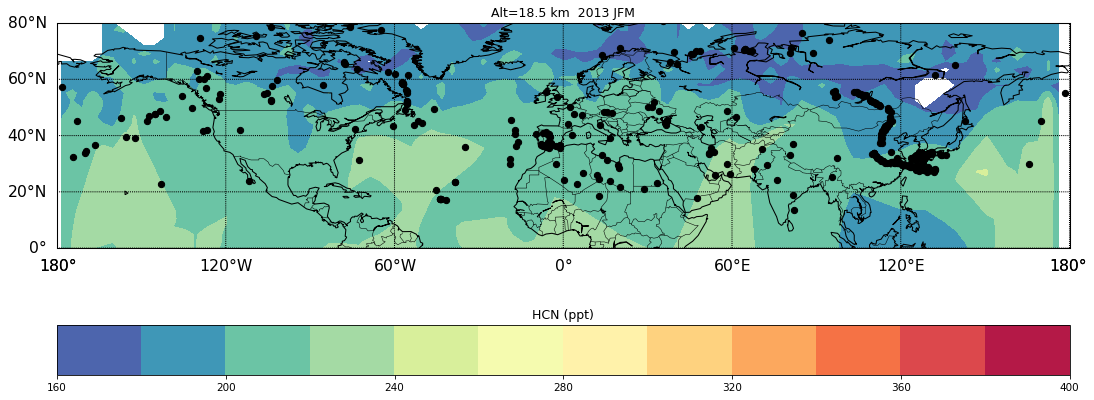

-181.59 179.58 -81.41 83.25


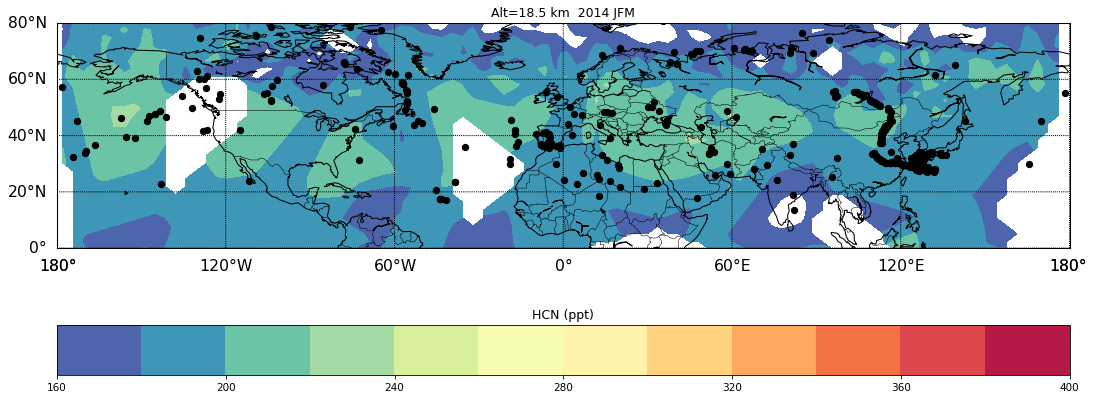

-180.44 179.34 -81.19 83.37


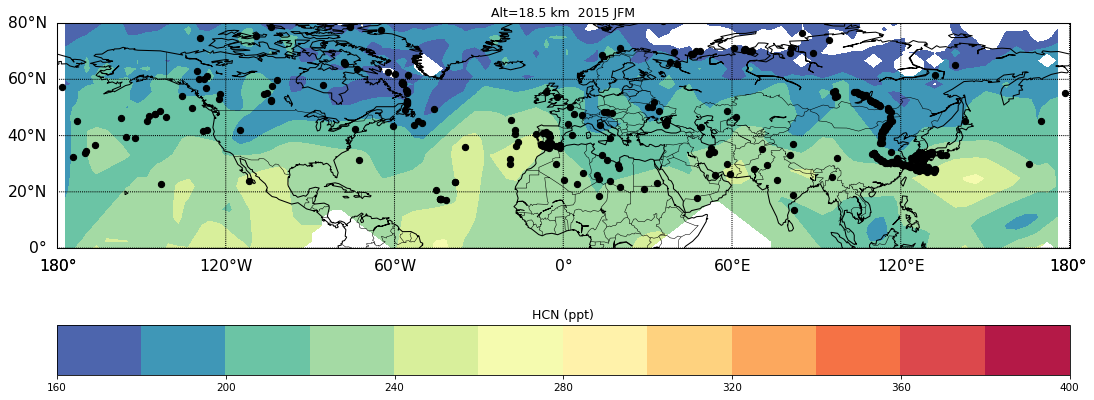

-180.45 184.79 -81.53 83.29


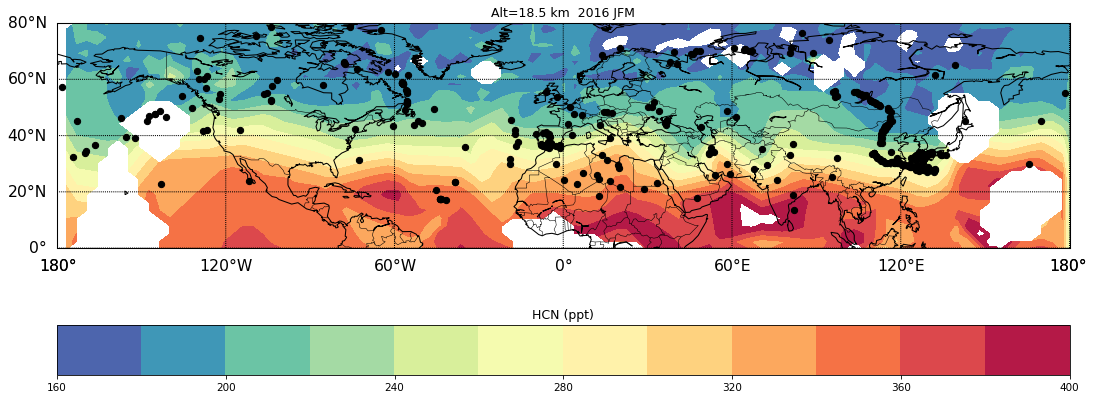

-179.42 188.29 -81.64 83.1


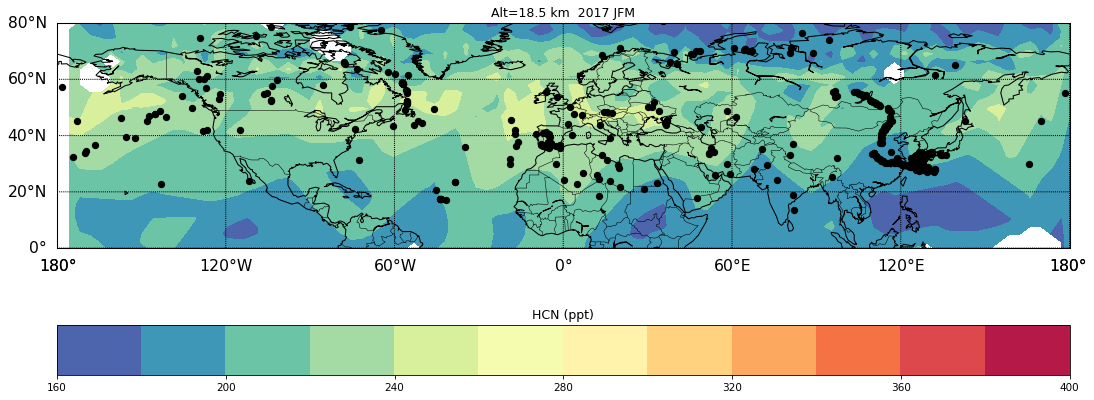

-180.81 186.59 -81.74 82.95


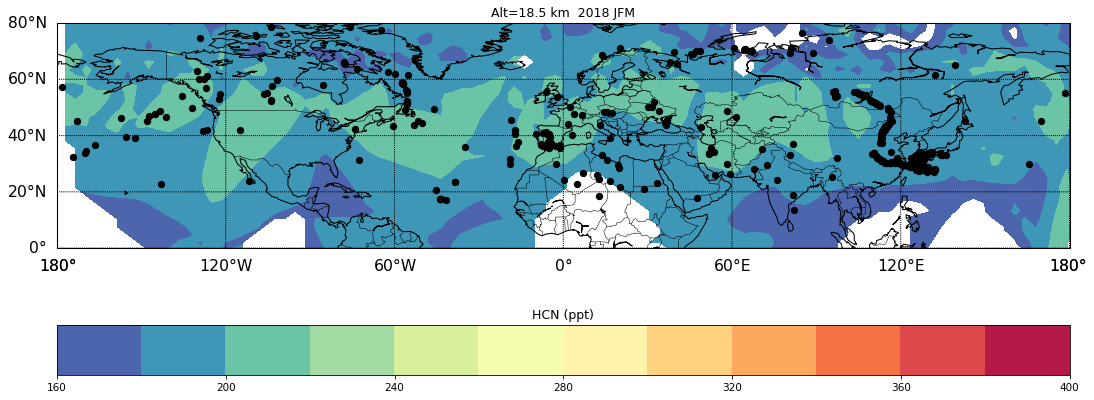

In [98]:
get_pl(18, 2013, 1, 2, 3)
get_pl(18, 2014, 1, 2, 3)
get_pl(18, 2015, 1, 2, 3)
get_pl(18, 2016, 1, 2, 3)
get_pl(18, 2017, 1, 2, 3)
get_pl(18, 2018, 1, 2, 3)

/home/icg1/icg140/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/icg1/icg140/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


-181.94 179.71 -81.75 83.08


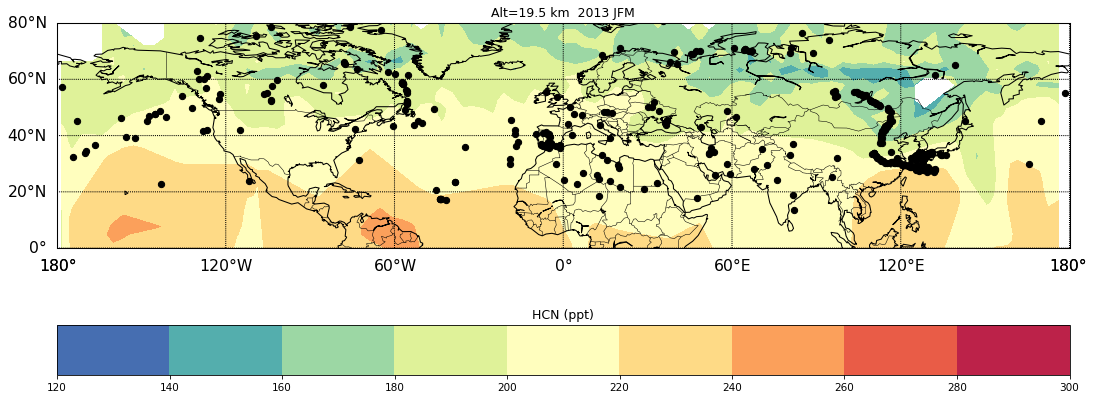

-181.59 179.58 -81.41 83.25


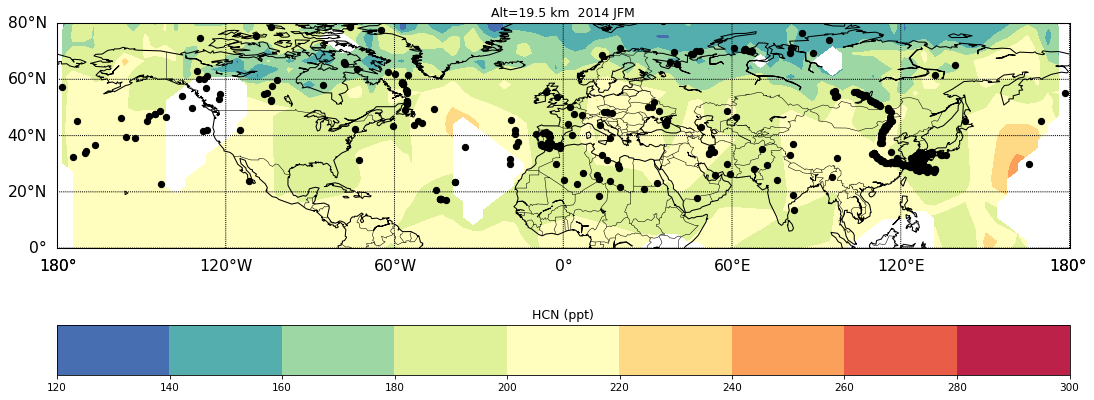

-180.44 179.34 -81.19 83.37


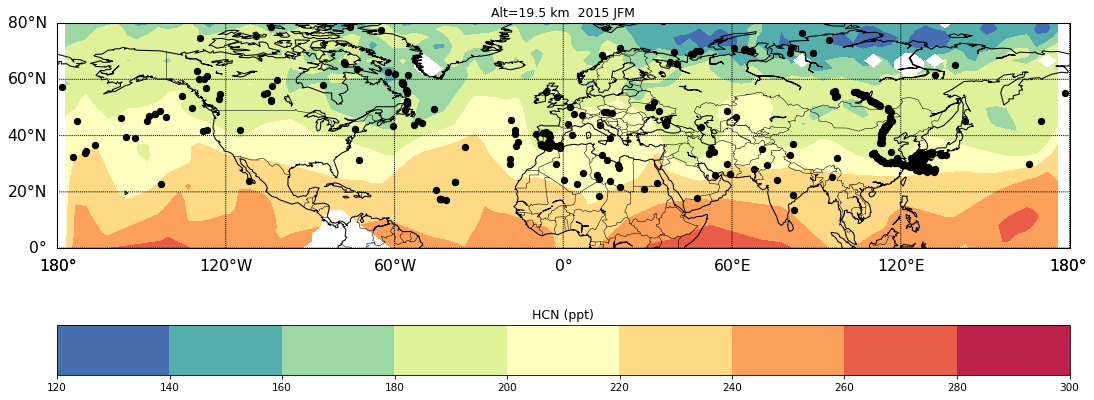

-180.45 184.79 -81.53 83.29


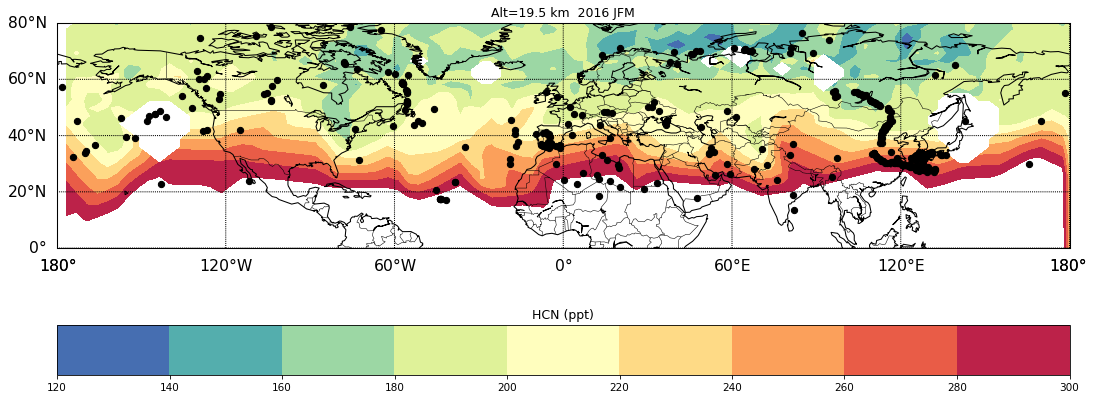

-179.42 188.29 -81.64 83.1


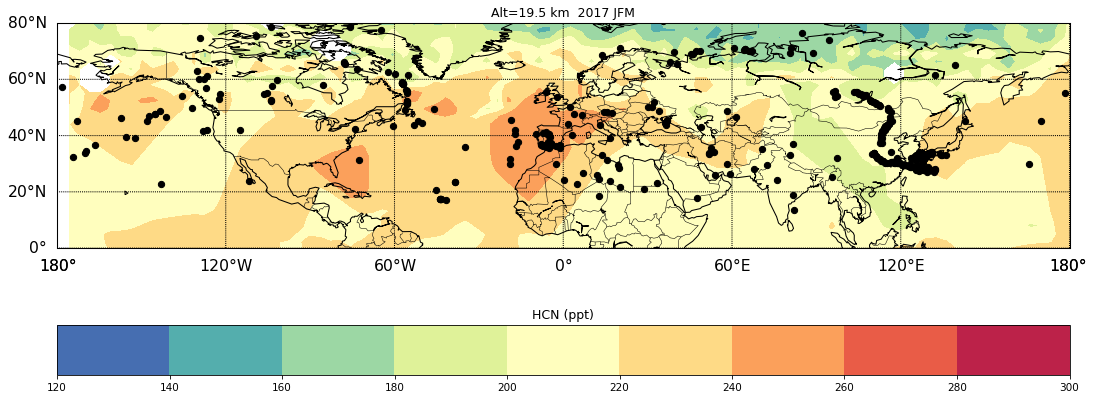

-180.81 186.59 -81.74 82.95


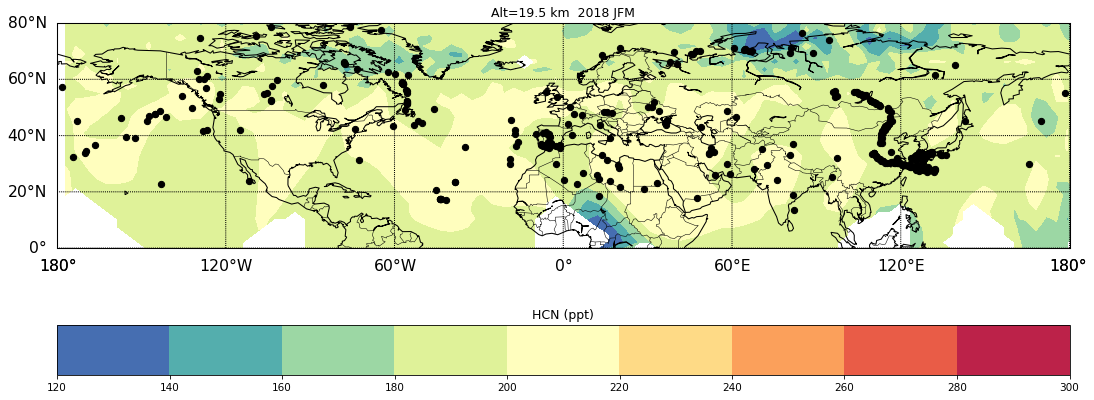

In [100]:
get_pl(19, 2013, 1, 2, 3)
get_pl(19, 2014, 1, 2, 3)
get_pl(19, 2015, 1, 2, 3)
get_pl(19, 2016, 1, 2, 3)
get_pl(19, 2017, 1, 2, 3)
get_pl(19, 2018, 1, 2, 3)

/home/icg1/icg140/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/icg1/icg140/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


-181.18 179.28 -80.78 68.69


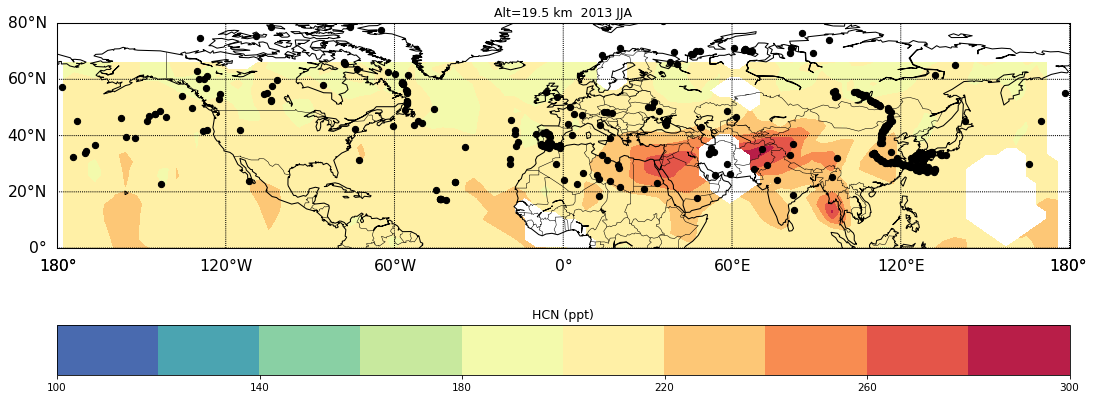

-181.14 179.25 -80.64 68.72


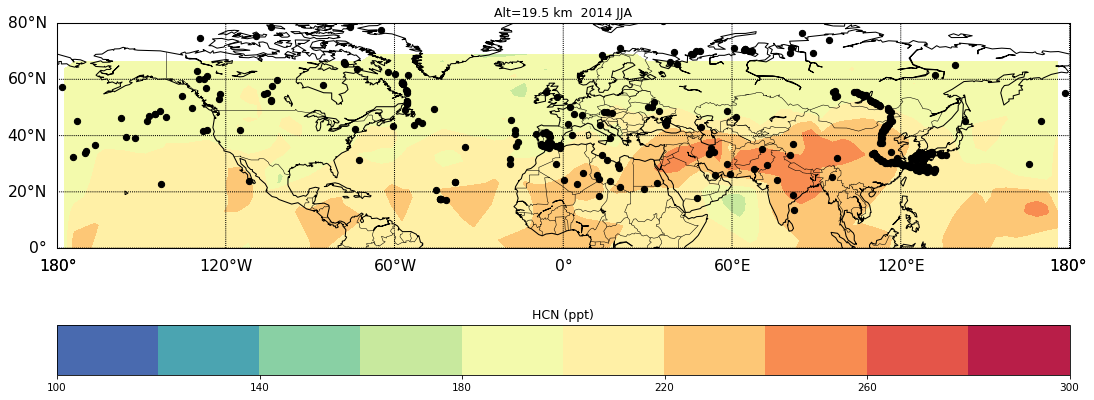

-180.71 179.92 -80.41 68.73


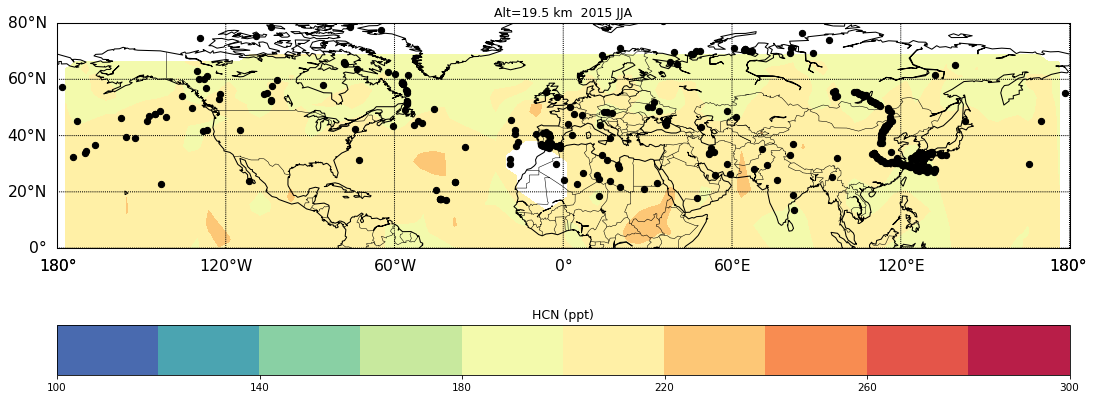

-179.72 180.27 -80.71 68.71


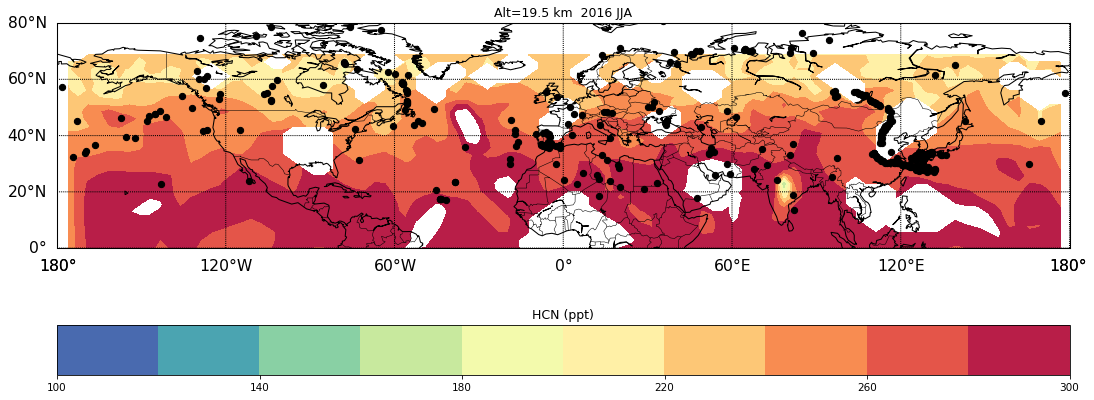

-181.55 180.63 -80.66 68.67


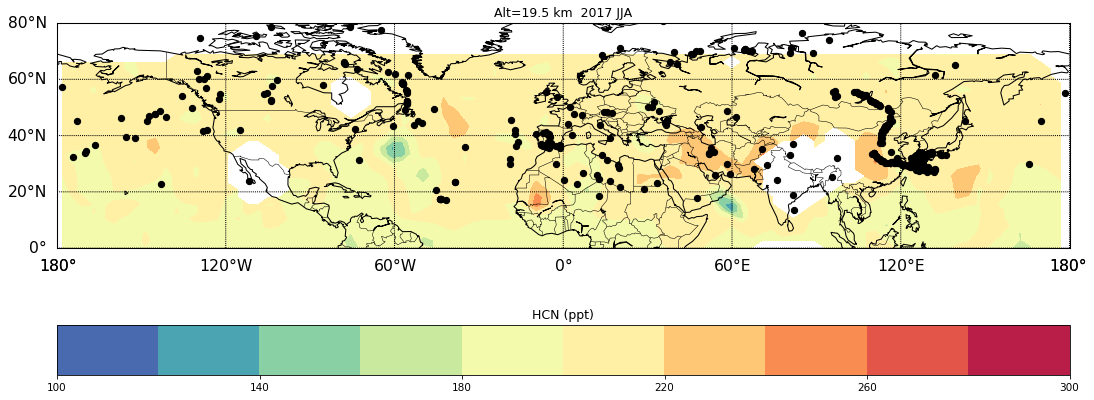

nan nan nan nan


ValueError: No points given

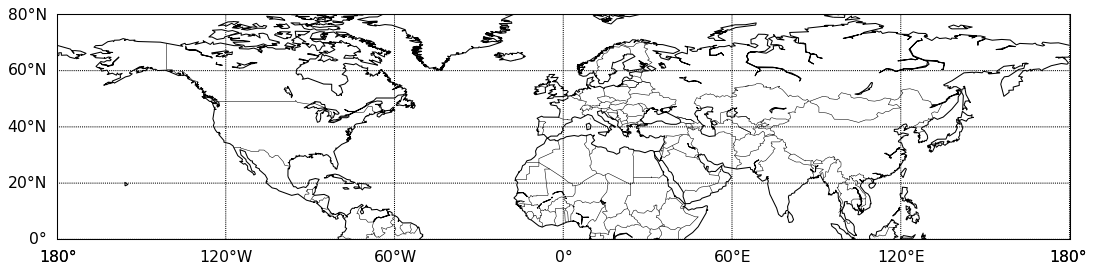

In [72]:
get_pl(19, 2013, 6, 7, 8)
get_pl(19, 2014, 6, 7, 8)
get_pl(19, 2015, 6, 7, 8)
get_pl(19, 2016, 6, 7, 8)
get_pl(19, 2017, 6, 7, 8)

/home/icg1/icg140/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/icg1/icg140/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


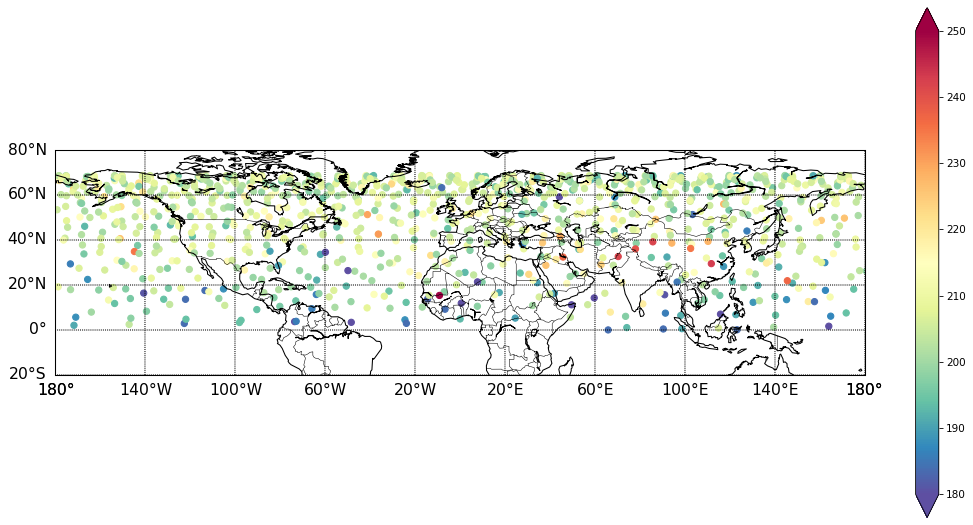

/home/icg1/icg140/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/icg1/icg140/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


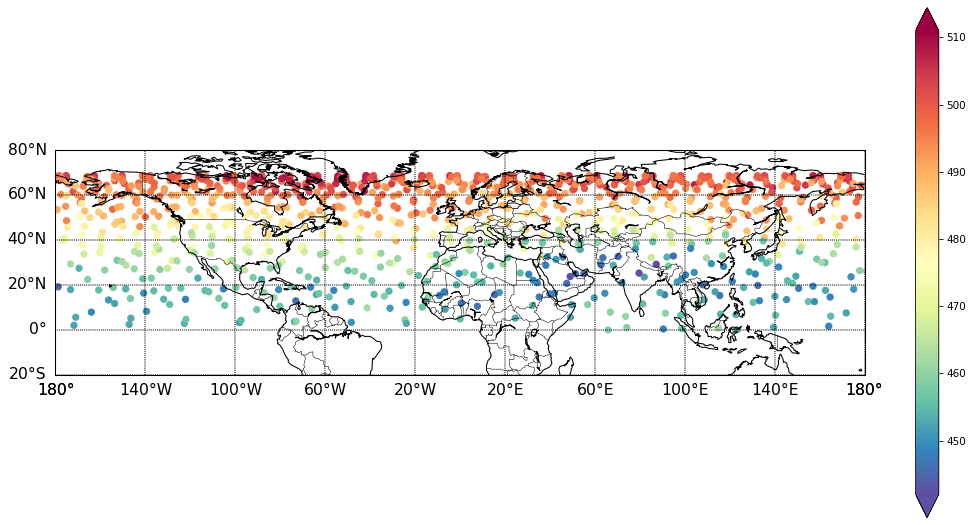

In [57]:
%matplotlib inline
df2 = df_all[df_all['year']==2017]
df = df2[(df2['month']==5)|(df2['month']==6)|(df2['month']==7)|(df2['month']==8)]
df = df[df['lat']>0]

fig = plt.figure(1, figsize=(15, 8), dpi=75)
ax = fig.add_axes([0.05, 0.05, 0.9, 0.85])
m = Basemap(projection='cyl', llcrnrlat=-20, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(-20, 81, 20.), labels=[1, 0, 0, 0], fontsize=15)
m.drawmeridians(np.arange(-180, 181., 40.), labels=[0, 0, 0, 1], fontsize=15)
m.drawmapboundary()
plt.scatter(df['lon'], df['lat'], c=1.e+12*df['HCN'], vmin=180, vmax=250, cmap='Spectral_r')
plt.colorbar(extend='both')
plt.show()

fig = plt.figure(1, figsize=(15, 8), dpi=75)
ax = fig.add_axes([0.05, 0.05, 0.9, 0.85])
m = Basemap(projection='cyl', llcrnrlat=-20, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(-20, 81, 20.), labels=[1, 0, 0, 0], fontsize=15)
m.drawmeridians(np.arange(-180, 181., 40.), labels=[0, 0, 0, 1], fontsize=15)
m.drawmapboundary()
plt.scatter(df['lon'], df['lat'], c=df['THETA'], cmap='Spectral_r')
plt.colorbar(extend='both')
plt.show()

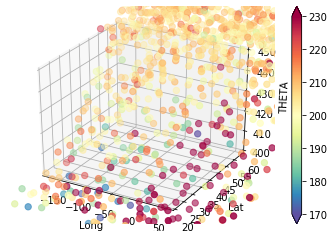

In [12]:
% matplotlib qt5

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
y = ax.scatter(df['lon'], df['lat'], df['THETA'], c=1.e+12*df['HCN'], cmap='Spectral_r', s=40, vmin=170, vmax=230)

ax.set_xlabel('Long')
ax.set_ylabel('Lat')
ax.set_zlabel('THETA')
ax.set_xlim(-180, 60)
ax.set_ylim(20, 60)
ax.set_zlim(400, 450)

fig.colorbar(y, extend='both')

plt.show()